# 1. Check Dataset

### A. Import libraries 

In [36]:
! pip freeze > toto.txt

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
import os
from os import listdir
from os.path import isfile, join


### B. Check if the .environ is working

In [2]:
# We created an line in .env that is called 'image_folder' with the path of the file and print
# it in order to ceheck if it is working for us

os.environ['IMAGE_FOLDER']


'/Users/nataliamenacho/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data/images_cropped_sample'

### C. Build X and y 

In [3]:
#We named the 'Image_folder' as 'image_dir' and like that it could be easier to call it
image_dir = os.environ['IMAGE_FOLDER']

#Created this in order to recover all our downloaded images on the IMAGE_FOLDER
image_files = []
for f in listdir(image_dir):
    print(f)
    if isfile(os.path.join(image_dir, f)):
        if f.endswith(".jpg"):
            image_files.append(f)
        else:
            print("not jpg ignored")

#We considered that our input X will be the images that we downloaded and the 'y' will be
# the classification "stars or galaxy"
X_list = []
y_list = []
print(image_files)
for image_file in image_files:
    image_info = image_file.replace('.jpg', '').split("_")
    cat = image_info[3]
    image_data = np.array(Image.open(os.path.join(image_dir,image_file)))
    #print(image_info)
    #print(image_data.shape)
    X_list.append(image_data)
    y_list.append(cat)

X_data = np.array(X_list)
print(X_data.shape)
y_data = np.array(y_list)
print(y_data.shape)

1237664673256571815_206.152742248973_35.7832473187171_GALAXY_1.010923.jpg
1237678597545591138_341.669732121639_2.68301678396564_STAR_1.209123.jpg
1237661971714802594_167.43558751989_7.25414879542971_GALAXY_0.6665187.jpg
1237678661426872832_6.57664509322581_4.68786591849795_STAR_2.225737.jpg
1237680272035807907_331.937003344296_19.1261163729245_STAR_0.0001422011.jpg
1237671257982959869_71.7395540497452_22.8695598593538_STAR_-8.090883E-05.jpg
1237680275799212442_6.26243031097539_26.8156110992586_STAR_2.767038.jpg
1237666301632512172_57.5976223070929_0.822063361286141_GALAXY_0.1848572.jpg
1237680275797901779_2.92129873999653_26.7423939900832_GALAXY_0.350847.jpg
1237663782598148618_25.9370141980074_-1.22368504381066_GALAXY_0.2391574.jpg
1237680246816637360_5.46604500701631_20.3671261289832_GALAXY_0.6223869.jpg
1237659154224579580_258.073424808874_23.2493670116733_STAR_-0.0003176941.jpg
1237653652374814984_7.09083700083437_15.2762710357545_GALAXY_0.2505086.jpg
1237680299419763284_338.218180

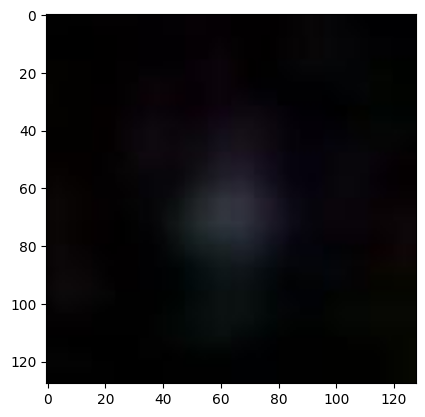

In [4]:
#Plot an image in order to check that our code was working and we had the correct images
plt.imshow(X_data[3])

In [6]:
#As the catergory star and galaxy was on a text version on the file we had to replace it
# by numbers 0 and 1.

y_data_cat = pd.Series(y_data).map({'STAR':0, 'GALAXY':1})
y_data_cat

0       1
1       0
2       1
3       0
4       0
       ..
4837    0
4838    0
4839    0
4840    1
4841    0
Length: 4842, dtype: int64

### D. Split our dataset

In [7]:
#As mentioned before, our X will be our downloaded images
X = X_data
#We will use the function we had above and name it 'y'
y = y_data_cat

#Split the dataset and add a stratify argument/parameter, which asks whether you want to
# retain the same proportion of classes in the train and test sets that are found in the
# entire original dataset. For example, if there are 100 observations in the entire original
# dataset of which 80 are class 𝑎and 20 are class 𝑏 and you set stratify = True, with a .7 : .3
# train-test split, you will get a training set with 56 examples of class 𝑎and 14 examples of
# class 𝑏.
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)


In [8]:
#Once we split our dataset, we will check the shape and realise if our output is coherent or
# not with our dataset

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3873, 128, 128, 3), (969, 128, 128, 3), (3873,), (969,))

# 1. The Convolutional Neural Network 

We will create our first model called "model_1", this will be our departure point. 

### A. Architecture and compilation of a CNN

In [35]:
#Create our first test model
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

/Users/nataliamenacho/.pyenv/versions/3.10.6/envs/to_infinity_and_beyond/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       615,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 634,453 (2.42 MB)

 Trainable params: 634,453 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#Compile model
model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','recall','precision','mae','mse'])


### B. Training the CNN

In [13]:
#Train the model
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5)

history_1 = model_1.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_split=0.2,
          callbacks=[es])


Epoch 1/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.6057 - loss: 0.6707 - mae: 0.4791 - mse: 0.2389 - precision: 0.6057 - recall: 1.0000 - val_accuracy: 0.5935 - val_loss: 0.6757 - val_mae: 0.4809 - val_mse: 0.2413 - val_precision: 0.5935 - val_recall: 1.0000
Epoch 2/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.6061 - loss: 0.6705 - mae: 0.4784 - mse: 0.2388 - precision: 0.6061 - recall: 1.0000 - val_accuracy: 0.5935 - val_loss: 0.6757 - val_mae: 0.4807 - val_mse: 0.2413 - val_precision: 0.5935 - val_recall: 1.0000
Epoch 3/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.6260 - loss: 0.6621 - mae: 0.4736 - mse: 0.2346 - precision: 0.6260 - recall: 1.0000 - val_accuracy: 0.5935 - val_loss: 0.6758 - val_mae: 0.4803 - val_mse: 0.2414 - val_precision: 0.5935 - val_recall: 1.0000
Epoch 4/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.5904 - loss: 0.6772 - mae: 0.4812 - mse: 0.2420 - precision: 0.5904 - recall: 1.0000 - val_accuracy:

In [14]:
#model_1.save('../models/to-infinity-beyond.model.01.keras')

### C. Evaluate model's performance

In [15]:
# Evaluate the model
model_1.evaluate(X_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6129 - loss: 0.6675 - mae: 0.4755 - mse: 0.2373 - precision: 0.6129 - recall: 1.0000


[0.6701581478118896,
 0.6068111658096313,
 1.0,
 0.6068111658096313,
 0.4768500328063965,
 0.23859380185604095]

### D. Plot loss and accuracy

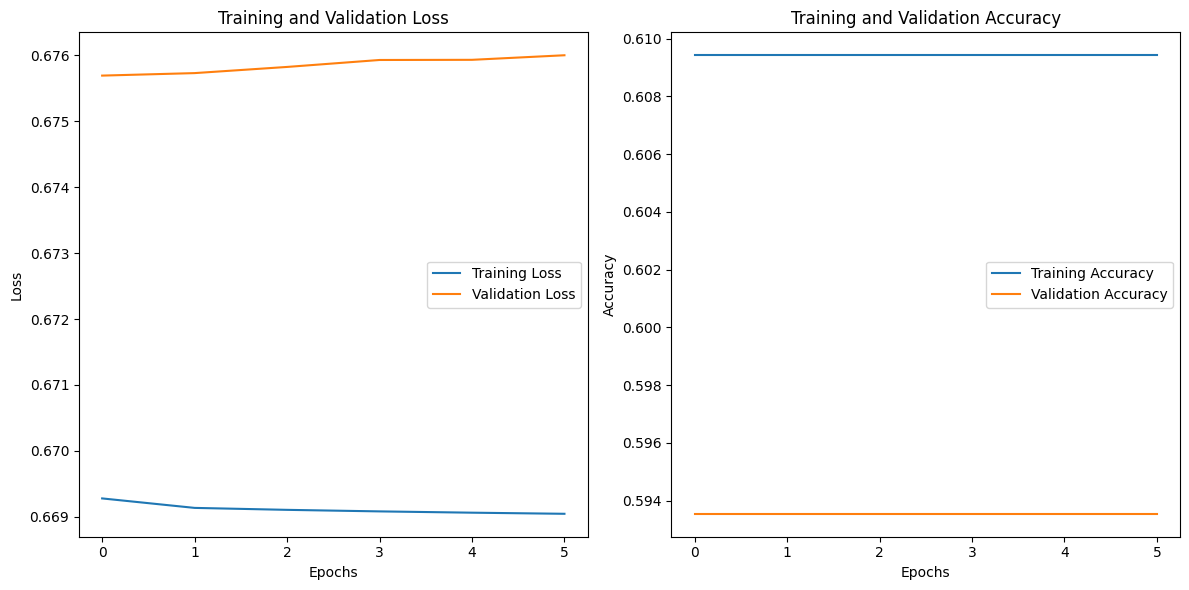

In [16]:
# Plot the training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Seems a promising model so we will keep it in order to test it against the best other.

# 2. The Convolutional Neural Network - part 2 

We will create 4 other models, and chose one between them to comparte it agains model_1.

In [17]:
# Model 2: Increase neurons in the Dense layer
model_2 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(20, activation='relu'),
    Dense(1, activation='sigmoid')])


# Model 3: Further increase neurons in the Dense layer
model_3 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Model 4: Increase number of filters in Conv2D layers
model_4 = Sequential([
    Conv2D(64, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(30, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Model 5: Added 2 dropout.
model_5 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [18]:
# Compile the models
models = [model_2, model_3, model_4, model_5]
for i, model in enumerate(models, start=1):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'recall', 'precision', 'mae', 'mse'])
    print(f"Model {i} compiled.")

Model 1 compiled.
Model 2 compiled.
Model 3 compiled.
Model 4 compiled.


In [19]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
es = EarlyStopping(patience=5)

# Placeholder for storing histories
histories = []

# Train each model and store the history
for i, model in enumerate(models, start=1):
    print(f"Training Model {i}...")
    history = model.fit(X_train, y_train,
                        batch_size=16,
                        epochs=100,
                        validation_split=0.2,
                        callbacks=[es])
    histories.append(history)
    print(f"Model {i} trained.")


Training Model 1...
Epoch 1/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - accuracy: 0.8577 - loss: 3.9849 - mae: 0.1797 - mse: 0.1303 - precision: 0.8781 - recall: 0.8817 - val_accuracy: 0.9277 - val_loss: 0.3228 - val_mae: 0.1675 - val_mse: 0.0705 - val_precision: 0.9391 - val_recall: 0.9391
Epoch 2/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.8973 - loss: 0.4109 - mae: 0.1622 - mse: 0.0854 - precision: 0.9071 - recall: 0.9279 - val_accuracy: 0.9200 - val_loss: 0.3142 - val_mae: 0.1114 - val_mse: 0.0658 - val_precision: 0.9129 - val_recall: 0.9565
Epoch 3/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.9004 - loss: 0.3981 - mae: 0.1702 - mse: 0.0849 - precision: 0.9093 - recall: 0.9300 - val_accuracy: 0.9303 - val_loss: 0.3185 - val_mae: 0.1368 - val_mse: 0.0635 - val_precision: 0.9229 - val_recall: 0.9630
Epoch 4/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.9347 - loss: 0.2518 - mae: 0.1368 - mse: 0.0597 - precision: 0.9359 - recall: 0.

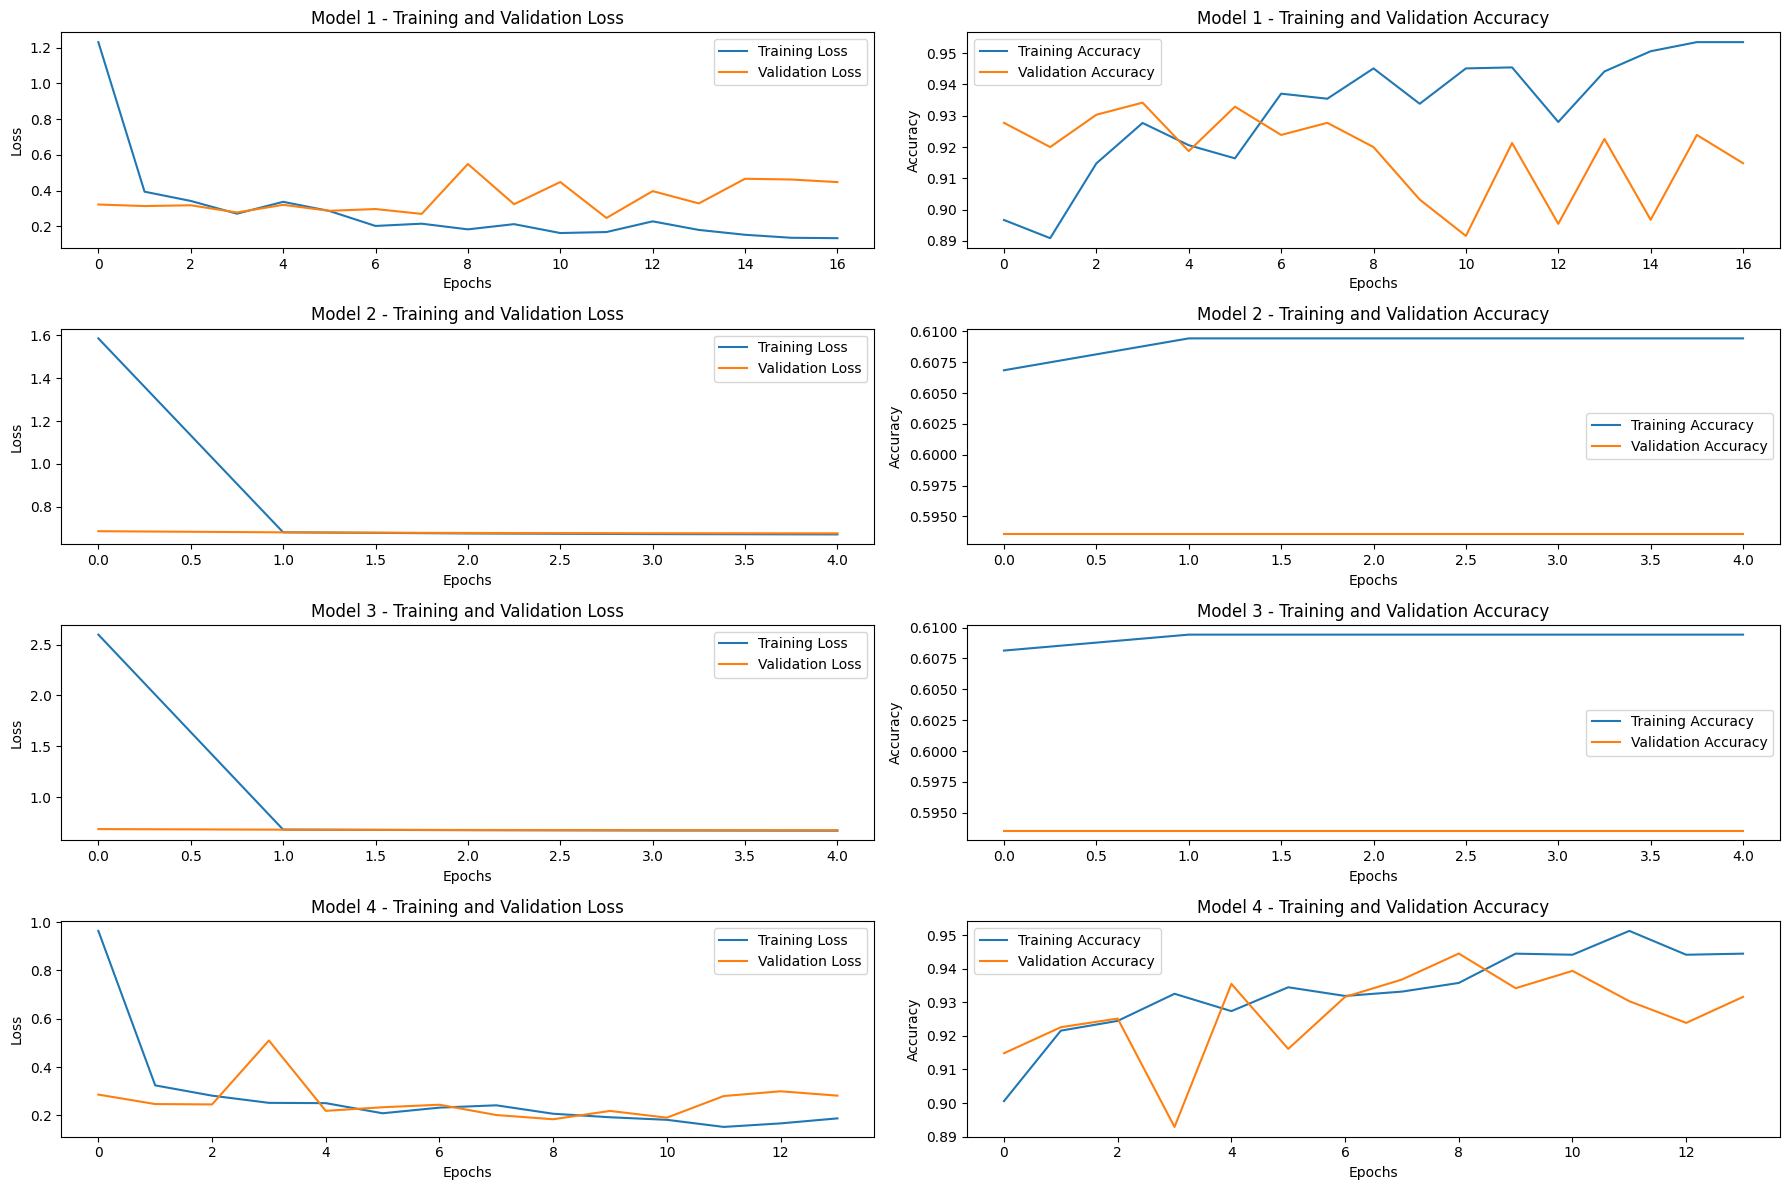

In [20]:
# Plot the training and validation loss and accuracy for all models
plt.figure(figsize=(18, 12))

for i, history in enumerate(histories, start=1):
    plt.subplot(4, 2, i * 2 - 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Model {i} - Training and Validation Loss')
    plt.legend()

    plt.subplot(4, 2, i * 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Model {i} - Training and Validation Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

### We will take the second model plotted on the graph which looks better than all the others

In [37]:
#y_train.value_counts()/len(y_train)

## Comparison between "model_1" and "model_3"
## Check our new dataset with more images

The next step will be to take our downloaded images plus the data augmentation, like that we will get more images for our test. 

### A. Import our data augmentation

In [38]:
#Import our data augmentation
from space_agent.interface.interface_main import create_rotated_images, copy_images_sorted

In [23]:
create_rotated_images()

index: 0 - rc: 0 - RAS
index: 1 - rc: 0 - RAS
index: 2 - rc: 0 - RAS
index: 3 - rc: 0 - RAS
index: 4 - rc: 0 - RAS
index: 5 - rc: 0 - RAS
index: 6 - rc: 0 - RAS
index: 7 - rc: 0 - RAS
index: 8 - rc: 0 - RAS
index: 9 - rc: 0 - RAS
index: 10 - rc: 0 - RAS
index: 11 - rc: 0 - RAS
index: 12 - rc: 0 - RAS
index: 13 - rc: 0 - RAS
index: 14 - rc: 0 - RAS
index: 15 - rc: 0 - RAS
index: 16 - rc: 0 - RAS
index: 17 - rc: 0 - RAS
index: 18 - rc: 0 - RAS
index: 19 - rc: 0 - RAS
index: 20 - rc: 0 - RAS
index: 21 - rc: 0 - RAS
index: 22 - rc: 0 - RAS
index: 23 - rc: 0 - RAS
index: 24 - rc: 0 - RAS
index: 25 - rc: 0 - RAS
index: 26 - rc: 0 - RAS
index: 27 - rc: 0 - RAS
index: 28 - rc: 0 - RAS
index: 29 - rc: 0 - RAS
index: 30 - rc: 0 - RAS
index: 31 - rc: 0 - RAS
index: 32 - rc: 0 - RAS
index: 33 - rc: 0 - RAS
index: 34 - rc: 0 - RAS
index: 35 - rc: 0 - RAS
index: 36 - rc: 0 - RAS
index: 37 - rc: 0 - RAS
index: 38 - rc: 0 - RAS
index: 39 - rc: 0 - RAS
index: 40 - rc: 0 - RAS
index: 41 - rc: 0 - RAS
in

In [24]:
copy_images_sorted()

index: 0 - image 1237664673256571815_206.152742248973_35.7832473187171_GALAXY_1.010923.jpg copied to GALAXY
index: 1 - image 1237678597545591138_341.669732121639_2.68301678396564_STAR_1.209123.jpg copied to STAR
index: 2 - image 1237661971714802594_167.43558751989_7.25414879542971_GALAXY_0.6665187.jpg copied to GALAXY
index: 3 - image 1237678661426872832_6.57664509322581_4.68786591849795_STAR_2.225737.jpg copied to STAR
index: 4 - image 1237680272035807907_331.937003344296_19.1261163729245_STAR_0.0001422011.jpg copied to STAR
index: 5 - image 1237671257982959869_71.7395540497452_22.8695598593538_STAR_-8.090883E-05.jpg copied to STAR
index: 6 - image 1237680275799212442_6.26243031097539_26.8156110992586_STAR_2.767038.jpg copied to STAR
index: 7 - image 1237666301632512172_57.5976223070929_0.822063361286141_GALAXY_0.1848572.jpg copied to GALAXY
index: 8 - image 1237680275797901779_2.92129873999653_26.7423939900832_GALAXY_0.350847.jpg copied to GALAXY
index: 9 - image 1237663782598148618_

### B. Retrieve information about images

As we have 39% stars and 61% galaxies, its better to balanced them between our sorted images, and our data augmented images. like that we could have 50/50 and train our model with it. 

In [25]:
import shutil
import random
def generate_balanced_dataset(galaxy_dir, star_dir, galaxy_aug_dir, star_aug_dir, balanced_dir):
    # Ensure the balanced directory exists
    if not os.path.exists(balanced_dir):
        os.makedirs(balanced_dir)
    # Get the list of files in each directory
    galaxy_files = os.listdir(galaxy_dir)
    star_files = os.listdir(star_dir)
    galaxy_aug_files = os.listdir(galaxy_aug_dir)
    star_aug_files = os.listdir(star_aug_dir)
    # Count the number of images in each directory
    galaxy_count = len(galaxy_files)
    star_count = len(star_files)
    galaxy_aug_count = len(galaxy_aug_files)
    star_aug_count = len(star_aug_files)
    # Copy all original images to the balanced directory
    for file in galaxy_files:
        shutil.copy(os.path.join(galaxy_dir, file), balanced_dir)
    for file in star_files:
        shutil.copy(os.path.join(star_dir, file), balanced_dir)
    if galaxy_aug_count > star_aug_count:
        # Copy all star augmented images to the balanced directory
        for file in star_aug_files:
            shutil.copy(os.path.join(star_aug_dir, file), balanced_dir)
        # Copy star_aug_count - (galaxy_count - star_count) galaxy augmented images to the balanced directory
        additional_files = random.sample(galaxy_aug_files, star_aug_count - (galaxy_count - star_count))
        for file in additional_files:
            shutil.copy(os.path.join(galaxy_aug_dir, file), balanced_dir)
    else:
        # Copy all galaxy augmented images to the balanced directory
        for file in galaxy_aug_files:
            shutil.copy(os.path.join(galaxy_aug_dir, file), balanced_dir)
        # Copy galaxy_aug_count - (star_count - galaxy_count) star augmented images to the balanced directory
        additional_files = random.sample(star_aug_files, galaxy_aug_count - (star_count - galaxy_count))
        for file in additional_files:
            shutil.copy(os.path.join(star_aug_dir, file), balanced_dir)

In [26]:
generate_balanced_dataset(
    "/Users/nataliamenacho/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data/images_cropped_sorted/GALAXY", "/Users/nataliamenacho/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data/images_cropped_sorted/STAR", "/Users/nataliamenacho/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data/images_cropped_from_augmentation/GALAXY", "/Users/nataliamenacho/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data/images_cropped_from_augmentation/STAR", "/Users/nataliamenacho/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data/images_final")

In [27]:
#Create New dataframe with image_final
image_dir_new = "/Users/nataliamenacho/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data/images_final"

#We do exactly the same thing as before, but this time our "X_data" will contain our augmented and our sorted data and get a 50/50 of
#stars and galaxies
image_files_new = []
for f in listdir(image_dir_new):
    print(f)
    if isfile(os.path.join(image_dir_new, f)):
        if f.endswith(".jpg"):
            image_files_new.append(f)
        else:
            print("not jpg ignored")

X_list = []
y_list = []
print(image_files_new)
for image_file in image_files_new:
    image_info = image_file.replace('.jpg', '').split("_")
    cat = image_info[3]
    image_data = np.array(Image.open(os.path.join(image_dir_new,image_file)))
    #print(image_info)
    #print(image_data.shape)
    X_list.append(image_data)
    y_list.append(cat)

X_data_new = np.array(X_list)
print(X_data_new.shape)
y_data_new = np.array(y_list)
print(y_data_new.shape)


1237664673256571815_206.152742248973_35.7832473187171_GALAXY_1.010923.jpg
1237665534931239467_240.301221618041_18.9631556767118_STAR_1.040037_90.jpg
1237663782603194608_37.4590453495958_-1.1794841566412_GALAXY_0.2860934_90.jpg
1237673706654859420_123.755881390279_43.3815376157854_STAR_-0.0001686188_90.jpg
1237663782600245312_30.7252790164969_-1.23973260168984_GALAXY_0.09963445_90.jpg
1237678597545591138_341.669732121639_2.68301678396564_STAR_1.209123.jpg
1237657401335349673_117.390523174037_28.3419623315302_GALAXY_7.566335E-05_270.jpg
1237661971718078646_175.001395957573_7.47020314544088_GALAXY_0.07972629_180.jpg
1237658206112580179_152.421595498876_46.4217603037237_GALAXY_0.5066113_180.jpg
1237661971714802594_167.43558751989_7.25414879542971_GALAXY_0.6665187.jpg
1237650797287834814_132.699086443371_0.949252412404551_GALAXY_0.0004263824_180.jpg
1237657589785493988_180.964889543145_54.4978801142953_STAR_2.082755_90.jpg
1237678661426872832_6.57664509322581_4.68786591849795_STAR_2.225737.

In [28]:
#Same manipulation as before
import pandas as pd
y_data_cat_new = pd.Series(y_data_new).map({'STAR':0, 'GALAXY':1})
y_data_cat_new

0        1
1        0
2        1
3        0
4        1
        ..
17422    0
17423    1
17424    0
17425    0
17426    0
Length: 17427, dtype: int64

### C. Split our dataset

In [29]:

#df = pd.read_csv('/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data')
X = X_data_new
y = y_data_cat_new

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

Last try with 2 models (the first one and the model_3) using the augmented images

In [30]:
#Model r2d2: Further increase neurons in the Dense layer
model_r2d2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

#Model c3po: Further increase neurons in the Dense layer
model_c3po = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

/Users/nataliamenacho/.pyenv/versions/3.10.6/envs/to_infinity_and_beyond/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# Compile the models
models = [model_r2d2, model_c3po]
for i, model in enumerate(models, start=1):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'recall', 'precision', 'mae', 'mse'])
    print(f"Model {i} compiled.")

Model 1 compiled.
Model 2 compiled.


In [32]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
es = EarlyStopping(patience=5)

# Placeholder for storing histories
histories = []

# Train each model and store the history
for i, model in enumerate(models, start=1):
    print(f"Training Model {i}...")
    history = model.fit(X_train, y_train,
                        batch_size=16,
                        epochs=100,
                        validation_split=0.2,
                        callbacks=[es])
    histories.append(history)
    print(f"Model {i} trained.")

Training Model 1...
Epoch 1/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 36s 51ms/step - accuracy: 0.8733 - loss: 0.8884 - mae: 0.2019 - mse: 0.1132 - precision: 0.8674 - recall: 0.9169 - val_accuracy: 0.9183 - val_loss: 0.2702 - val_mae: 0.1551 - val_mse: 0.0690 - val_precision: 0.9090 - val_recall: 0.9487
Epoch 2/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - accuracy: 0.9098 - loss: 0.3174 - mae: 0.1719 - mse: 0.0794 - precision: 0.8984 - recall: 0.9479 - val_accuracy: 0.9154 - val_loss: 0.2587 - val_mae: 0.1467 - val_mse: 0.0697 - val_precision: 0.8821 - val_recall: 0.9795
Epoch 3/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - accuracy: 0.9178 - loss: 0.2539 - mae: 0.1409 - mse: 0.0666 - precision: 0.9023 - recall: 0.9575 - val_accuracy: 0.9269 - val_loss: 0.2595 - val_mae: 0.1082 - val_mse: 0.0590 - val_precision: 0.9200 - val_recall: 0.9519
Epoch 4/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 34s 49ms/step - accuracy: 0.9339 - loss: 0.2327 - mae: 0.1197 - mse: 0.0567 - precision: 0.9211 - recall: 0.

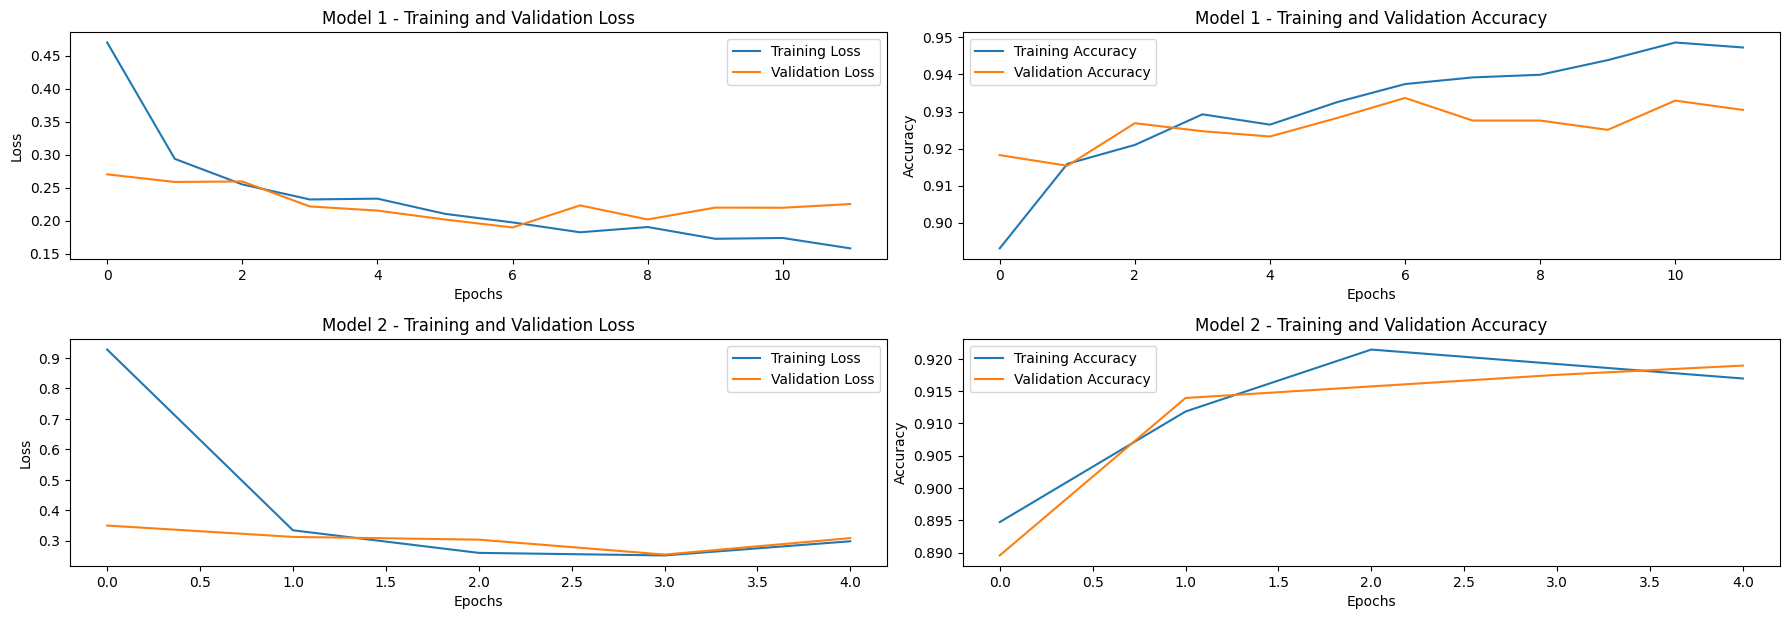

In [33]:
# Plot the training and validation loss and accuracy for all models
plt.figure(figsize=(18, 12))

for i, history in enumerate(histories, start=1):
    plt.subplot(4, 2, i * 2 - 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Model {i} - Training and Validation Loss')
    plt.legend()

    plt.subplot(4, 2, i * 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Model {i} - Training and Validation Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

In [34]:
model_r2d2.save('../models/to-infinity-beyond.model.r2d2.keras')